# Visualtization: Matrix Plot

In [2]:
# imports
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import read_h5ad
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt

## old analysis

In [1]:
# this is for comparing results from 3m and 24m data

In [2]:
# imports
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import read_h5ad
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt

In [3]:
# read in raw data
adata = read_h5ad('/Users/madelinepark/Downloads/Limb_Muscle_facs.h5ad')

In [4]:
# read in results and sort by gini
results_24 = pd.read_csv('/Users/madelinepark/src2/maca-data-analysis/results_age_first_24m.csv')
results_sorted_24 = results_24.sort_values(by='24m_gini',ascending=False)

results_3 = pd.read_csv('/Users/madelinepark/src2/maca-data-analysis/results_age_first_3m.csv')
results_sorted_3 = results_3.sort_values(by='3m_gini',ascending=False)

In [15]:
# take top genes and ginis, here we chose 10
results_top_24_gene = results_sorted_24['24m'][0:10]
results_top_24_gini = results_sorted_24['24m_gini'][0:10]

results_top_3_gene = results_sorted_3['3m'][0:10]
results_top_3_gini = results_sorted_3['3m_gini'][0:10]

In [10]:
results_top_genes = list(set(results_top_gene_list) & set(adata.var_names.values))

In [11]:
results_top_gene_list = []
results_top_gene_list.extend(results_top_24_gene)
results_top_gene_list.extend(results_top_3_gene)

In [12]:
adatasubset = adata[adata.obs['age'].isin(['3m','24m'])]

In [13]:
# Need to change the order of the ages 
adatasubset.obs['age_num'] = adatasubset.obs['age'] 
adatasubset.obs['age_num'] = [an.split('m')[0] for an in adatasubset.obs['age_num']]

Trying to set attribute `.obs` of view, making a copy.


... storing 'age_num' as categorical


saving figure to file ./figures/matrixplot_top_30_droplet_test_8.pdf


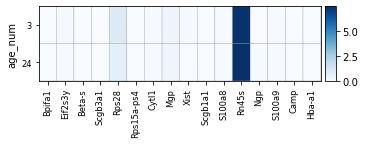

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[5.12, 0, 0.2])

In [14]:
sc.pl.matrixplot(adatasubset, results_top_genes,
              groupby='age_num', dendrogram=False,log=True,cmap='Blues',save = '_top_30_droplet_test_8.pdf') 